# Plot snow depth over time

This exploratory notebook plots snow depth over time. It specifies one specific SNOTEL station and queries the SNOTEL data API for that station. It then defines a "snow season" as November through April of the following year so we can plot snow depth over seasons over time.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
SNOTEL_API = "https://wcc.sc.egov.usda.gov/awdbRestApi/services/v1/data"
station_triplet = "642:WA:SNTL"

Noting that it's unclear how data availability aligns with reported data collection in snotel stations metadata. The API only returns data starting from 2005 even though the metadata reports a beginData for this station of 1978.

In [3]:
params = {
    'stationTriplets': station_triplet,
    'elements': 'SNWD',
    'duration': 'DAILY',
    'periodRef': 'END',
    'beginDate': "2000-01-01 00:00",
    'endDate': "2025-06-01 00:00",
}
response = requests.get(SNOTEL_API, params=params)

In [4]:
df = pd.DataFrame(response.json()[0]['data'][0]["values"])
df.date = pd.to_datetime(df.date)
df.head()

,date,value
0,2005-10-11,0
1,2005-10-12,0
2,2005-10-13,0
3,2005-10-14,0
4,2005-10-15,0


There was a 2014-2015 snow drought, possibly due to [the blob](https://en.wikipedia.org/wiki/The_Blob_(Pacific_Ocean)).

<Axes: xlabel='date'>

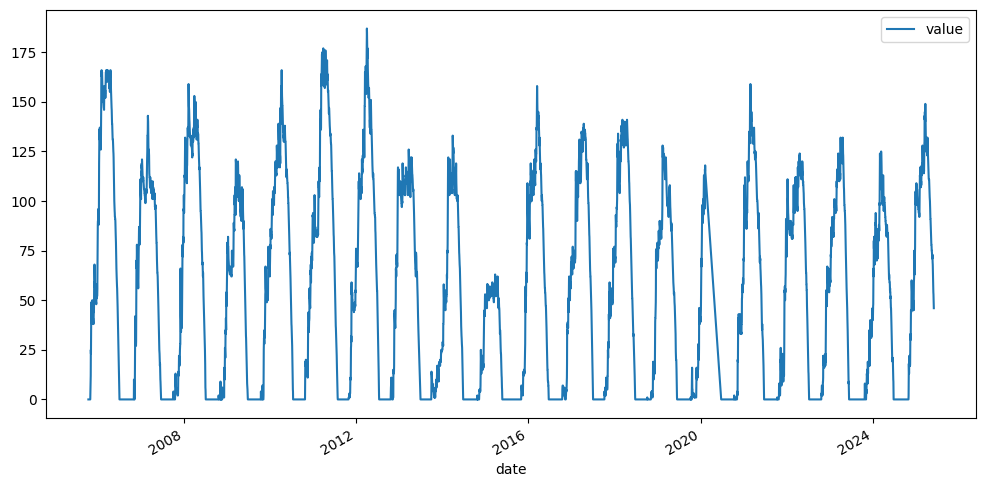

In [5]:
df.date = pd.to_datetime(df.date)
df.plot(x='date', y='value', figsize=(12, 6))

In [6]:
def get_season_year(date):
    month = date.month
    year = date.year
    
    if month in [11, 12, 1, 2, 4]:
        # For Nov-Dec, use current year. For Jan-Mar, use previous year
        # This groups Nov 2023 - Mar 2024 as "2023-2024"
        if month in [11, 12]:
            season_year = f"{year}-{year+1}"
        else:  # Jan, Feb, Mar, April
            season_year = f"{year-1}-{year}"
        return ('Nov-Mar', season_year)
    # else:
    #     return ('Other', str(year))

df['season_info'] = df['date'].apply(get_season_year)
df['season'] = df['season_info'].str[0]
df['season_year'] = df['season_info'].str[1]

# Group by both season and year
grouped = df.groupby(['season_year'])['value'].sum()

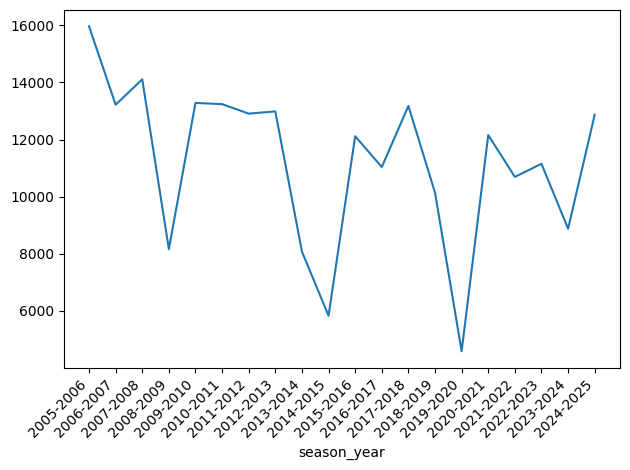

In [7]:
ax = grouped.plot(xticks=range(len(grouped.index)))
ax.set_xticklabels(grouped.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()